## Implementation of AlexNet on ImageNet

In [13]:
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
import os
import numpy as np
from PIL import Image
from keras.regularizers import l2

In [5]:
def get_annotations_map():
    valAnnotationsPath = 'C:/Users/parag/Downloads/tiny-imagenet-200/val/val_annotations.txt'
    valAnnotationsFile = open(valAnnotationsPath, 'r')
    valAnnotationsContents = valAnnotationsFile.read()
    valAnnotations = {}

    for line in valAnnotationsContents.splitlines():
        pieces = line.strip().split()
        valAnnotations[pieces[0]] = pieces[1]

    return valAnnotations

Loading 200 classes
loading training images...
finished loading training images
loading test images...
finished loading test images
0
0
1
1


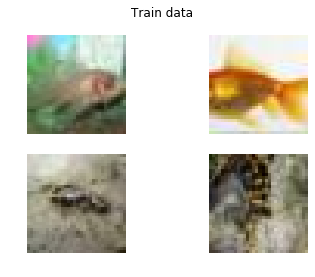

107
175
192
192


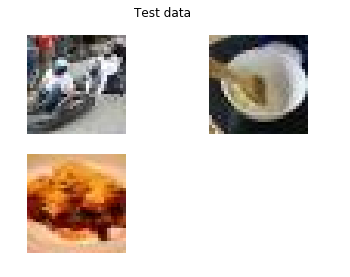

In [6]:


def load_images(path,num_classes):
    #Load images
    
    print('Loading ' + str(num_classes) + ' classes')

    X_train=np.zeros([num_classes*500,3,32,32],dtype='uint8')
    y_train=np.zeros([num_classes*500], dtype='uint8')
    
    print('loading training images...');
    trainPath=path+'/train'

    i=0
    j=0
    annotations={}
    for sChild in os.listdir(trainPath):
        sChildPath = os.path.join(os.path.join(trainPath,sChild),'images')
        annotations[sChild]=j
        for c in os.listdir(sChildPath):
            X=np.array(Image.open(os.path.join(sChildPath,c)))
            if len(np.shape(X))==2:
                X_train[i]=np.array([X,X,X])
            else:
                X_train[i]=np.transpose(X,(2,0,1))
            y_train[i]=j
            i+=1
        j+=1
        if (j >= num_classes):
            break

    print('finished loading training images')

    val_annotations_map = get_annotations_map()

    X_test = np.zeros([num_classes*50,3,32,32],dtype='uint8')
    y_test = np.zeros([num_classes*50], dtype='uint8')


    print('loading test images...')

    i = 0
    valPath=path+ '/val/images'
    for sChild in os.listdir(valPath):
        if val_annotations_map[sChild] in annotations.keys():
            sChildPath = os.path.join(valPath, sChild)
            X=np.array(Image.open(sChildPath))
            if len(np.shape(X))==2:
                X_test[i]=np.array([X,X,X])
            else:
                X_test[i]=np.transpose(X,(2,0,1))
            y_test[i]=annotations[val_annotations_map[sChild]]
            i+=1
        else:
            pass


    print('finished loading test images')#+str(i)

    return X_train,y_train,X_test,y_test

if __name__ == "__main__":
    import matplotlib.pyplot as plt

    path=r'C:/Users/parag/Downloads/tiny-imagenet-200'
    X_train,y_train,X_test,y_test=load_images(path,200)#input data path & numbers of classes
    

    fig1 = plt.figure()
    fig1.suptitle('Train data')
    ax1 = fig1.add_subplot(221)
    ax1.axis("off")
    ax1.imshow(np.transpose(X_train[0],(1,2,0)))
    print(y_train[0])
    ax2 = fig1.add_subplot(222)
    ax2.axis("off")
    ax2.imshow(np.transpose(X_train[499],(1,2,0)))
    print(y_train[499])
    ax3 = fig1.add_subplot(223)
    ax3.axis("off")
    ax3.imshow(np.transpose(X_train[500],(1,2,0)))
    print(y_train[500])
    ax4 = fig1.add_subplot(224)
    ax4.axis("off")
    ax4.imshow(np.transpose(X_train[999],(1,2,0)))
    print(y_train[999])

    plt.show()

    fig2 = plt.figure()
    fig2.suptitle('Test data')
    ax1 = fig2.add_subplot(221)
    ax1.axis("off")
    ax1.imshow(np.transpose(X_test[0],(1,2,0)))
    print(y_test[0])
    ax2 = fig2.add_subplot(222)
    ax2.axis("off")
    ax2.imshow(np.transpose(X_test[49],(1,2,0)))
    print(y_test[49])
    ax3 = fig2.add_subplot(223)
    ax3.axis("off")
    ax3.imshow(np.transpose(X_test[50],(1,2,0)))
    print(y_test[50])
    ax4 = fig2.add_subplot(224)
    ax4.axis("off")
#     ax4.imshow(np.transpose(X_test[99],(1,2,0)))
    print(y_test[99])
    
    plt.show()

In [7]:
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 
X_train = X_train / 255.0 
X_test = X_test / 255.0

In [8]:
# one hot encode outputs 
y_train = np_utils.to_categorical(y_train) 
y_test = np_utils.to_categorical(y_test) 
num_classes = y_test.shape[1]

### AlexNet Implementation for Imagenet (resized to 32x32)

In [156]:
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(32,(7,7), input_shape=(3,32,32), strides=(4,4), padding='same'))
model.add(Activation('elu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))
model.add(Dropout(0.2))
# 2nd Convolutional Layer
model.add(Conv2D(32,(5,5), strides=(1,1), padding='same'))
model.add(Activation('elu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))
model.add(Dropout(0.3))
# 3rd Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('elu'))

#4th Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('elu'))

# #5th Convolutional Layer
# model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'))
# model.add(Activation('elu'))
# #Max Pooling
# model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(1024,activation='elu'))
#Add Dropout to prevent overfitting
model.add(Dropout(0.4))

# 2nd Fully Connected Layer
model.add(Dense(2048))
model.add(Activation('elu'))
# Add Dropout
model.add(Dropout(0.4))


# Output Layer
model.add(Dense(num_classes, activation='softmax'))


model.summary()
epoch = 50
learn_rate = 0.0001
dec = learn_rate /epoch
adam=keras.optimizers.Adam(learn_rate)
# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=adam, metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_237 (Conv2D)          (None, 1, 8, 32)          50208     
_________________________________________________________________
activation_252 (Activation)  (None, 1, 8, 32)          0         
_________________________________________________________________
max_pooling2d_128 (MaxPoolin (None, 1, 4, 32)          0         
_________________________________________________________________
dropout_75 (Dropout)         (None, 1, 4, 32)          0         
_________________________________________________________________
conv2d_238 (Conv2D)          (None, 1, 4, 32)          25632     
_________________________________________________________________
activation_253 (Activation)  (None, 1, 4, 32)          0         
_________________________________________________________________
max_pooling2d_129 (MaxPoolin (None, 1, 2, 32)          0         
__________

### Training the designed model
for 50 epoches

In [157]:
history = model.fit(X_train, y_train,epochs=epoch, validation_data=(X_test, y_test),batch_size=256) 
# Final evaluation of the model 
scores = model.evaluate(X_test, y_test, verbose=2) 
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 100000 samples, validate on 10000 samples
Epoch 1/50
100000/100000 [==============================] - 46s 458us/step - loss: 5.1649 - acc: 0.0120 - val_loss: 5.0185 - val_acc: 0.0222
Epoch 2/50
100000/100000 [==============================] - 45s 453us/step - loss: 4.9625 - acc: 0.0276 - val_loss: 4.8263 - val_acc: 0.0424
Epoch 3/50
100000/100000 [==============================] - 46s 458us/step - loss: 4.8396 - acc: 0.0397 - val_loss: 4.7427 - val_acc: 0.0549
Epoch 4/50
100000/100000 [==============================] - 47s 469us/step - loss: 4.7918 - acc: 0.0445 - val_loss: 4.7026 - val_acc: 0.0564
Epoch 5/50
100000/100000 [==============================] - 48s 476us/step - loss: 4.7632 - acc: 0.0470 - val_loss: 4.6732 - val_acc: 0.0594
Epoch 6/50
100000/100000 [==============================] - 46s 462us/step - loss: 4.7431 - acc: 0.0504 - val_loss: 4.6487 - val_acc: 0.0643
Epoch 7/50
100000/100000 [==============================] - 49s 485us/step - loss: 4.7151 - acc: 0.0538

The original alexnet was implemented on image of size 224x224. However, we have reduced the image size to 32x32, therefore size of network was reduced to test the hypothesis that reducing the number of neuron will improve the accuracy.

In [158]:
def plotter(trained_record):
    # Loss Curves
    plt.figure(figsize=[8,6])
    plt.plot(trained_record.history['loss'],'r',linewidth=3.0)
    plt.plot(trained_record.history['val_loss'],'b',linewidth=3.0)
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)
    plt.savefig('try1.png')
    # Accuracy Curves
    plt.figure(figsize=[8,6])
    plt.plot(trained_record.history['acc'],'r',linewidth=3.0)
    plt.plot(trained_record.history['val_acc'],'b',linewidth=3.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)

    plt.savefig('try2.png')

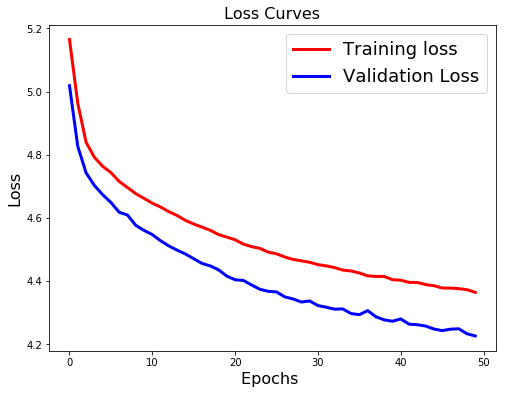

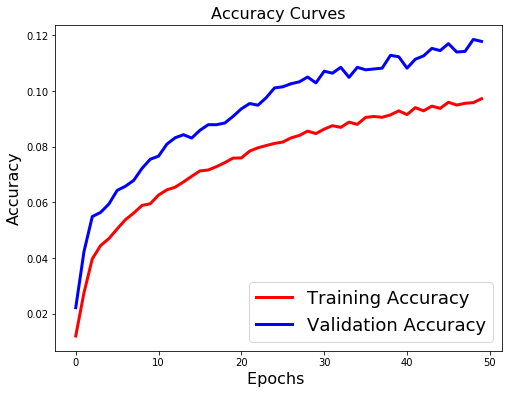

In [159]:
plotter(history)

## Conclusion

Reducing the number of neurons did not improve the performance of CNN classification model. So we can reject thethe hypothesis that the model would perform better after reducing the number of neurons because the model is giving similar performace as that of actual neural network.